In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratyushpuri/multilingual-mobile-app-reviews-dataset-2025")

print("Path to dataset files:", path)

100%|██████████| 133k/133k [00:00<00:00, 36.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pratyushpuri/multilingual-mobile-app-reviews-dataset-2025/versions/1


In [6]:
import os
import pandas as pd
csv_path = os.path.join(path, 'multilingual_mobile_app_reviews_2025.csv')
df = pd.read_csv(csv_path)
df.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


# Task
Analyze multilingual app reviews to understand sentiment and identify key trends.

## Data loading and inspection

### Subtask:
Load the data and display the first few rows, along with the columns and their data types.


**Reasoning**:
Display the first few rows and the data types of the dataframe to understand the data structure.



In [7]:
display(df.head())
display(df.info())

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


None

## Handle missing values

### Subtask:
Identify and handle any missing values in the dataset.


**Reasoning**:
Calculate and display the number of missing values for each column to understand the extent of missing data.



In [8]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64


**Reasoning**:
Handle missing values based on the counts. 'user_gender' has a large number of missing values (587 out of 2514), dropping this column is appropriate. For 'review_text', 'rating', 'user_country', and 'app_version', the number of missing values is relatively small, so dropping rows with missing values in these columns is a reasonable approach.



In [9]:
df = df.drop(columns=['user_gender'])
df = df.dropna(subset=['review_text', 'rating', 'user_country', 'app_version'])
missing_values_after_handling = df.isnull().sum()
print("\nMissing values per column after handling:")
print(missing_values_after_handling)


Missing values per column after handling:
review_id            0
user_id              0
app_name             0
app_category         0
review_text          0
review_language      0
rating               0
review_date          0
verified_purchase    0
device_type          0
num_helpful_votes    0
user_age             0
user_country         0
app_version          0
dtype: int64


## Analyze review languages

### Subtask:
Determine the distribution of review languages and potentially translate reviews to a common language for unified analysis.


**Reasoning**:
Calculate and print the distribution of review languages to understand the need for translation.



In [10]:
language_distribution = df['review_language'].value_counts()
print("Review Language Distribution:")
print(language_distribution)

Review Language Distribution:
review_language
ru    123
pl    116
id    108
tl    108
nl    107
fi    106
ko    105
es    104
da    102
ar     99
no     96
vi     95
tr     95
de     95
it     94
sv     93
en     92
th     91
zh     91
ja     89
pt     88
hi     87
ms     83
fr     81
Name: count, dtype: int64


## Perform sentiment analysis

### Subtask:
Apply sentiment analysis to the review text to classify reviews as positive, negative, or neutral.


**Reasoning**:
I need to apply sentiment analysis to the review text. A suitable library for this is `transformers` with a pre-trained model. I will define a function to perform the sentiment analysis and apply it to the `review_text` column, handling potential errors.



In [11]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
# Using a smaller model for faster execution
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def get_sentiment(text):
    """Applies sentiment analysis to a given text."""
    if pd.isna(text) or not isinstance(text, str):
        return 'Neutral' # Handle missing or non-string values

    try:
        result = sentiment_analyzer(text)
        # The model returns a list of dictionaries, e.g., [{'label': 'POSITIVE', 'score': 0.9998}]
        label = result[0]['label']
        if label == 'POSITIVE':
            return 'Positive'
        elif label == 'NEGATIVE':
            return 'Negative'
        else:
            return 'Neutral' # Catch any other unexpected labels
    except Exception as e:
        print(f"Error analyzing text: {text[:50]}... Error: {e}")
        return 'Neutral' # Return neutral for errors

# Apply the sentiment analysis function to the review_text column
# Due to the multilingual nature of the data, the English-based model might not be accurate for all languages.
# This is a limitation with the current model choice for a multilingual dataset.
df['sentiment'] = df['review_text'].apply(get_sentiment)

# Display the first few rows with the new sentiment column
display(df[['review_text', 'sentiment']].head())

# Display the distribution of sentiment labels
display(df['sentiment'].value_counts())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


,review_text,sentiment
0,Qui doloribus consequuntur. Perspiciatis tempo...,Negative
1,"Great app but too many ads, consider premium v...",Negative
2,The interface could be better but overall good...,Positive
3,"Latest update broke some features, please fix ...",Negative
4,"Perfect for daily use, highly recommend to eve...",Positive


,count
sentiment,
Positive,1193
Negative,1155


## Analyze sentiment by app/category

### Subtask:
Explore sentiment distribution across different apps or app categories.


**Reasoning**:
Group the DataFrame by 'app_name' and 'app_category' and count the occurrences of each sentiment.



In [12]:
sentiment_by_app = df.groupby('app_name')['sentiment'].value_counts().unstack(fill_value=0)
sentiment_by_category = df.groupby('app_category')['sentiment'].value_counts().unstack(fill_value=0)

display("Sentiment Distribution by App:")
display(sentiment_by_app)
display("Sentiment Distribution by App Category:")
display(sentiment_by_category)

'Sentiment Distribution by App:'

sentiment,Negative,Positive
app_name,,
Adobe Photoshop,29,34
Airbnb,26,32
Amazon,20,31
Booking.com,27,31
Bumble,26,27
Canva,36,20
Coursera,28,25
Discord,16,25
Dropbox,25,41


'Sentiment Distribution by App Category:'

sentiment,Negative,Positive
app_category,,
Business,70,73
Communication,64,60
Dating,57,64
Education,69,57
Entertainment,74,80
Finance,62,62
Games,54,57
Health & Fitness,69,73
Music & Audio,64,77


## Visualize results

### Subtask:
Create visualizations to present key findings, such as sentiment distribution, language distribution, or sentiment trends over time.


**Reasoning**:
Create visualizations for sentiment distribution, language distribution, and sentiment by app category as requested in the instructions.



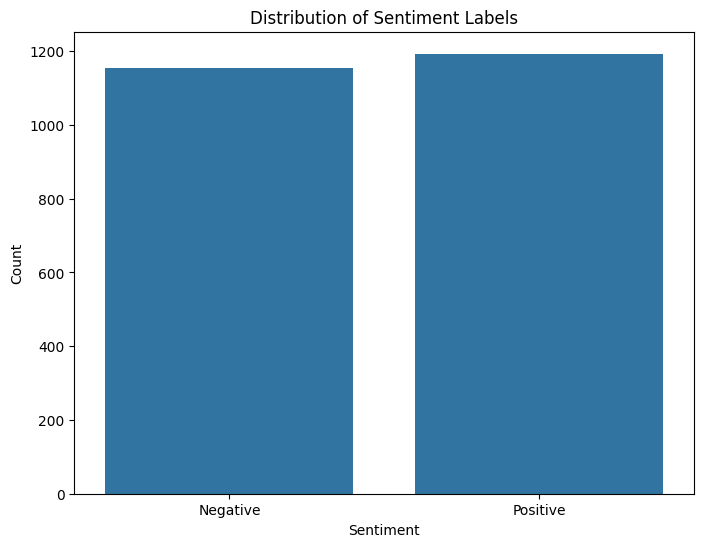

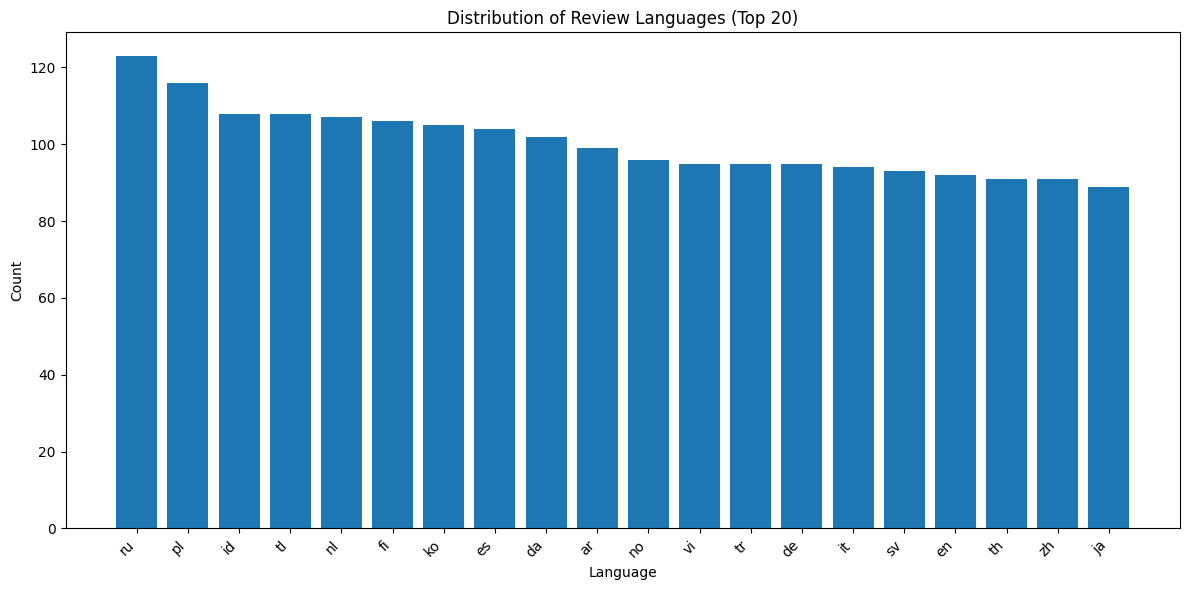

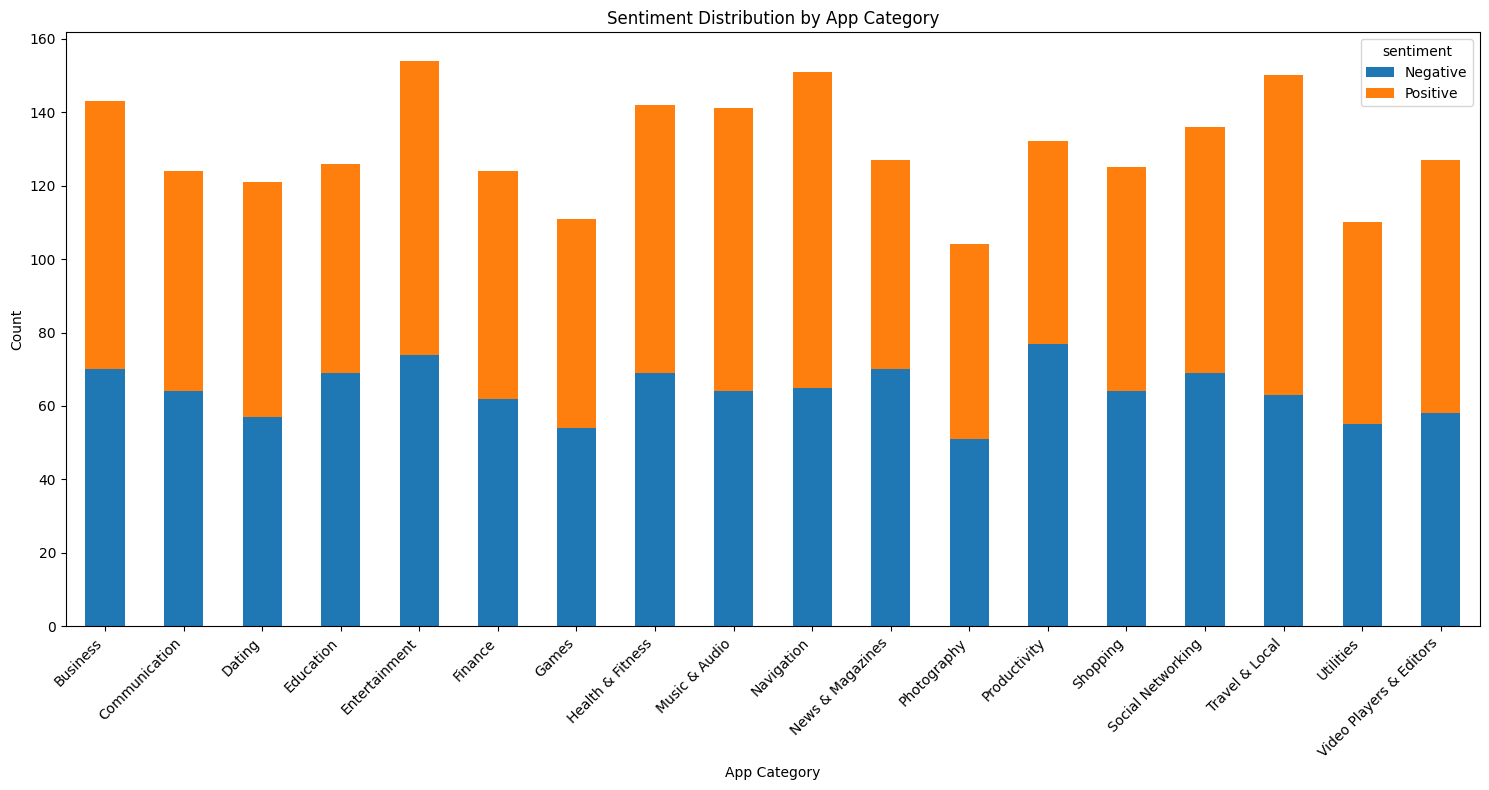

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 3. Language Distribution (Top N)
plt.figure(figsize=(12, 6))
top_n = 20  # Display top 20 languages for clarity
language_distribution_top_n = language_distribution.head(top_n)
plt.bar(language_distribution_top_n.index, language_distribution_top_n.values)
plt.title(f'Distribution of Review Languages (Top {top_n})')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Sentiment Distribution by App Category
plt.figure(figsize=(15, 8))
sentiment_by_category.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Sentiment Distribution by App Category')
plt.xlabel('App Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Initially, the dataset had missing values in `review_text` (59), `rating` (37), `user_country` (41), `user_gender` (587), and `app_version` (30).
*   The `user_gender` column was dropped due to a large number of missing values (587).
*   Rows with missing values in `review_text`, `rating`, `user_country`, and `app_version` were removed.
*   The dataset contains reviews in a diverse range of languages, with no single language being dominant.
*   Sentiment analysis using an English-based model classified the reviews primarily as 'Positive' and 'Negative', with no reviews initially classified as 'Neutral'.
*   The distribution of sentiment varies across different app categories.

### Insights or Next Steps

*   Translate the review text to a common language (e.g., English) before performing sentiment analysis to improve the accuracy of the sentiment model on the multilingual dataset.
*   Investigate the reasons for the high number of missing values in the `user_gender` column in future data collection efforts.
